<a href="https://www.kaggle.com/code/thomaslazarus/streaming-service-data-analysis?scriptVersionId=102629977" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Read in Data

In [2]:
hbo_df = pd.read_csv('/kaggle/input/hbo-max-tv-shows-and-movies/titles.csv')
dark_matter_df = pd.read_csv('/kaggle/input/dark-matter-tv-shows-and-movies/titles.csv')
amazon_df = pd.read_csv('/kaggle/input/amazon-prime-tv-shows-and-movies/titles.csv')
disney_df = pd.read_csv('/kaggle/input/disney-tv-shows-and-movies/titles.csv')
crunchyroll_df = pd.read_csv('/kaggle/input/crunchyroll-animes-and-movies/titles.csv')
hulu_df = pd.read_csv('/kaggle/input/hulu-tv-shows-and-movies/titles.csv')
paramount_df = pd.read_csv('/kaggle/input/paramount-tv-shows-and-movies/titles.csv')
netflix_df = pd.read_csv('/kaggle/input/netflix-tv-shows-and-movies/titles.csv')

Loads in the data and then adds the service column with the service for the CSV. This way they can all be combined into one DataFrame.

In [3]:
hbo_df = (hbo_df.assign(service="hbo"))
dark_matter_df = (dark_matter_df.assign(service="dark_matter"))
amazon_df = (amazon_df.assign(service="amazon"))
disney_df = (disney_df.assign(service="disney"))
crunchyroll_df = (crunchyroll_df.assign(service="crunchyroll"))
hulu_df = (hulu_df.assign(service="hulu"))
paramount_df = (paramount_df.assign(service="paramount"))
netflix_df = (netflix_df.assign(service="netflix"))

In [4]:
df_list = [hbo_df, dark_matter_df, amazon_df, disney_df, crunchyroll_df, hulu_df, paramount_df, netflix_df]
df = (pd.concat(df_list).reset_index(drop=True).drop(columns=['id']))
df.head()

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,service
0,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6,hbo
1,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0,hbo
2,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2,hbo
3,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7,hbo
4,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8,hbo


In [5]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,27876.000000,27876.000000,7673.000000,24933.000000,2.488900e+04,27056.000000,24281.000000
mean,2005.308940,76.151313,2.777271,6.283885,2.416158e+04,16.812792,6.447440
std,22.849828,37.204100,3.876521,1.313345,1.015164e+05,91.999801,1.419331
min,1901.000000,0.000000,1.000000,1.000000,5.000000e+00,0.000011,0.500000
25%,2004.000000,46.000000,1.000000,5.500000,2.100000e+02,1.850000,5.700000
50%,2015.000000,84.000000,1.000000,6.400000,1.112000e+03,4.551500,6.500000
75%,2019.000000,100.000000,3.000000,7.200000,6.940000e+03,11.979250,7.400000
max,2022.000000,549.000000,63.000000,9.900000,2.555504e+06,9323.832000,10.000000


# Charts

<AxesSubplot:title={'center':'Count of records by Streaming Services'}, xlabel='service'>

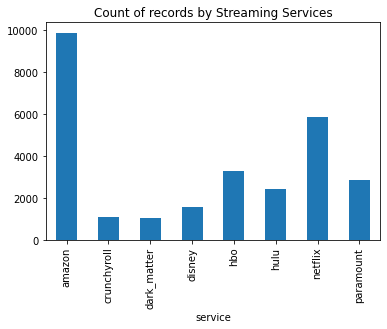

In [6]:
(df.groupby(['service']).size().plot.bar(title="Count of records by Streaming Services"))

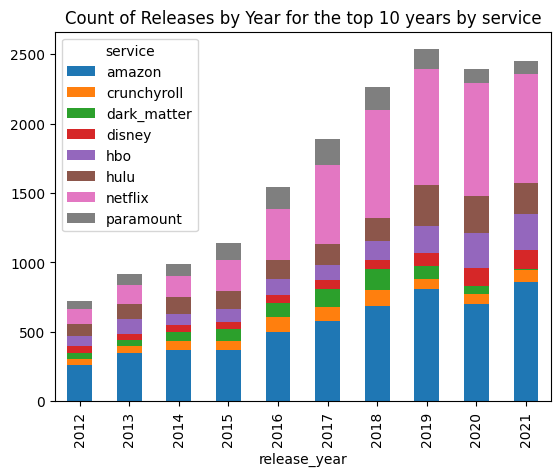

In [7]:
plt.style.use('default')
bar_df = (df.groupby(['release_year','service']).size().unstack(fill_value=0))
filter_df = (bar_df.T.sum().sort_values(ascending=False)[:10])
bar_df = bar_df.reset_index()
filter_df = filter_df.reset_index()
bar_df.loc[bar_df["release_year"].isin(filter_df["release_year"])].plot.bar(stacked=True, x="release_year", title="Count of Releases by Year for the top 10 years by service")
plt.style.use('seaborn')

<AxesSubplot:title={'center':'Average Score by Streaming Service'}, xlabel='service'>

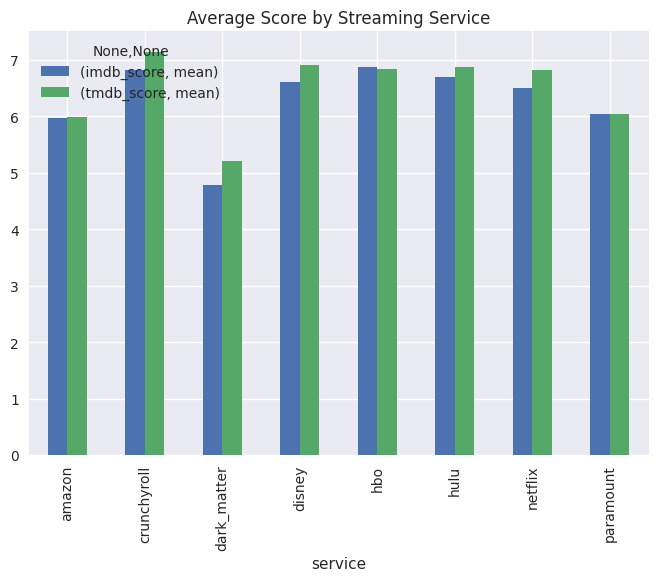

In [8]:
df.groupby(['service']).agg({'imdb_score':[np.mean], 'tmdb_score':[np.mean]}).plot.bar(title="Average Score by Streaming Service")

<AxesSubplot:title={'center':'Average TMDB Votes by Streaming Service'}, xlabel='service'>

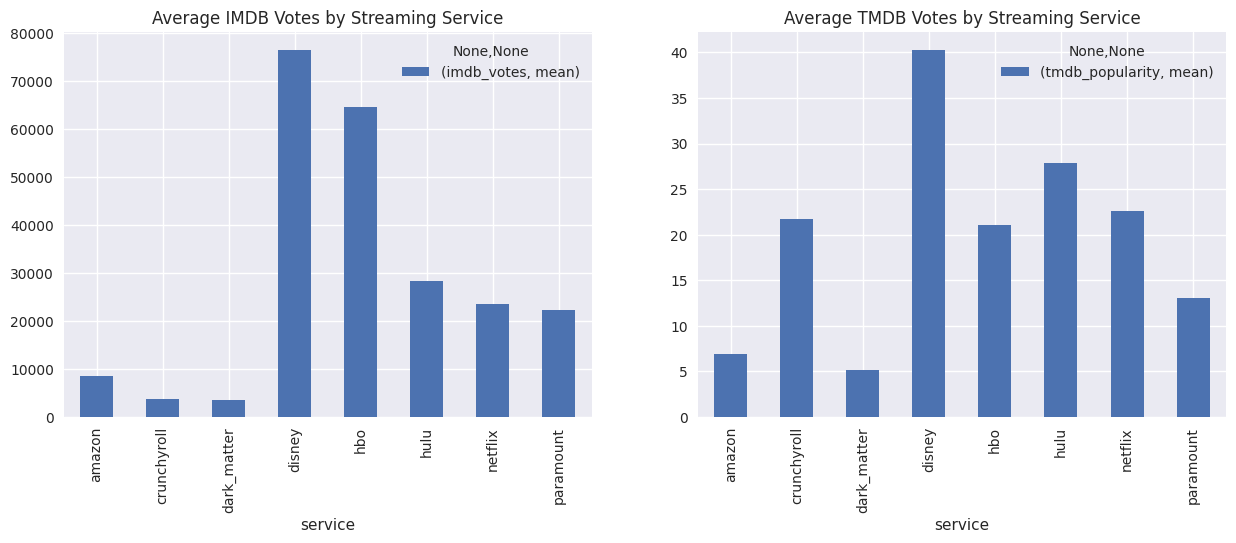

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
df.groupby(['service']).agg({'imdb_votes':[np.mean]}).plot.bar(title="Average IMDB Votes by Streaming Service", ax=axes[0])
df.groupby(['service']).agg({'tmdb_popularity':[np.mean]}).plot.bar(title="Average TMDB Votes by Streaming Service", ax=axes[1])

<AxesSubplot:title={'center':'Average Runtime by Streaming Service'}, xlabel='service'>

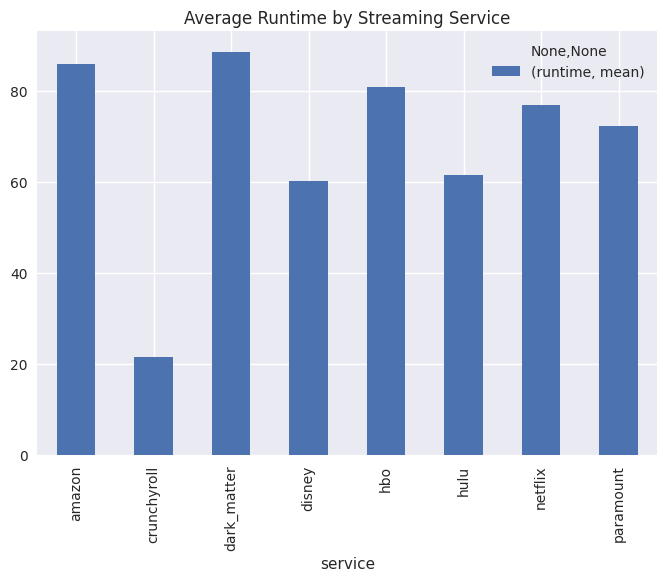

In [10]:
df.groupby(['service']).agg({'runtime':[np.mean]}).plot.bar(title="Average Runtime by Streaming Service")

<AxesSubplot:title={'center':'Count of Age Ratings'}, xlabel='age_certification'>

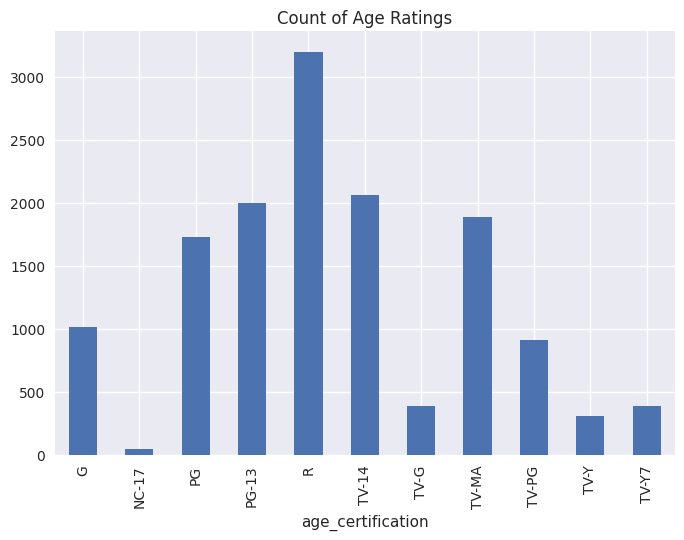

In [11]:
df.groupby(['age_certification']).size().plot.bar(title="Count of Age Ratings")

<AxesSubplot:ylabel='None'>

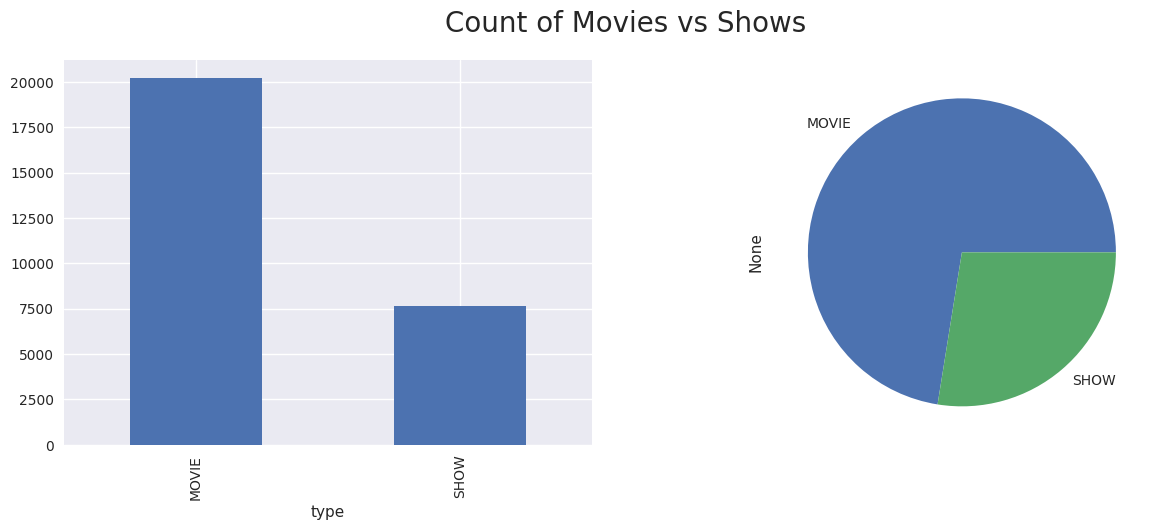

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.suptitle('Count of Movies vs Shows', fontsize=20)
type_df = (df.groupby(['type']).size())
type_df.plot.bar(ax=axes[0])
type_df.plot.pie(ax=axes[1])

<AxesSubplot:xlabel='type'>

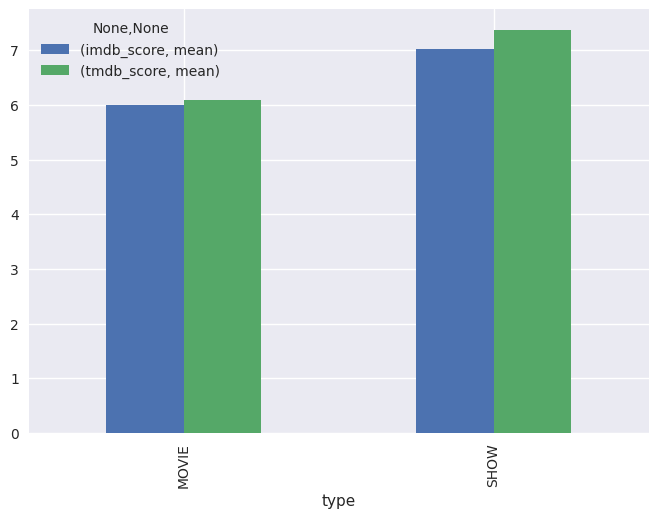

In [13]:
(df.groupby('type').agg({'imdb_score': [np.mean], 'tmdb_score': [np.mean]})).plot.bar()

In [14]:
print(f'Average number of seasons: {df.seasons.dropna().mean()}')

Average number of seasons: 2.777270950084713


In [15]:
df["genres"] = df.apply(lambda row: row["genres"].replace('[', '').replace(']', '').replace("'", "").split(", "), axis=1)
genre_df = pd.DataFrame(df.genres.values.tolist(), df.index).add_prefix('genre_')
genre_df.head()

,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10
0,fantasy,family,None,None,None,None,None,None,None,None,None
1,drama,None,None,None,None,None,None,None,None,None,None
2,drama,romance,war,None,None,None,None,None,None,None,None
3,thriller,crime,None,None,None,None,None,None,None,None,None
4,thriller,romance,crime,None,None,None,None,None,None,None,None


In [16]:
df = (df.join(genre_df).drop(columns=["genres"]))
df.head()

,title,type,description,release_year,age_certification,runtime,production_countries,seasons,imdb_id,imdb_score,...,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10
0,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,['US'],NaN,tt0032138,8.1,...,family,None,None,None,None,None,None,None,None,None
1,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['US'],NaN,tt0033467,8.3,...,None,None,None,None,None,None,None,None,None,None
2,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,['US'],NaN,tt0034583,8.5,...,romance,war,None,None,None,None,None,None,None,None
3,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,['US'],NaN,tt0038355,7.9,...,crime,None,None,None,None,None,None,None,None,None
4,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,['US'],NaN,tt0033870,8.0,...,romance,crime,None,None,None,None,None,None,None,None


In [17]:
df["production_countries"] = df.apply(lambda row: row["production_countries"].replace('[', '').replace(']', '').replace("'", "").split(", "), axis=1)
production_countries_df = pd.DataFrame(df.production_countries.values.tolist(), df.index).add_prefix('production_countries_')
production_countries_df.head()

,production_countries_0,production_countries_1,production_countries_2,production_countries_3,production_countries_4,production_countries_5,production_countries_6,production_countries_7,production_countries_8,production_countries_9
0,US,None,None,None,None,None,None,None,None,None
1,US,None,None,None,None,None,None,None,None,None
2,US,None,None,None,None,None,None,None,None,None
3,US,None,None,None,None,None,None,None,None,None
4,US,None,None,None,None,None,None,None,None,None


In [18]:
df = (df.join(production_countries_df).drop(columns=["production_countries"]))
df.head()

,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,...,production_countries_0,production_countries_1,production_countries_2,production_countries_3,production_countries_4,production_countries_5,production_countries_6,production_countries_7,production_countries_8,production_countries_9
0,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,NaN,tt0032138,8.1,389774.0,...,US,None,None,None,None,None,None,None,None,None
1,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,NaN,tt0033467,8.3,433804.0,...,US,None,None,None,None,None,None,None,None,None
2,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,NaN,tt0034583,8.5,558849.0,...,US,None,None,None,None,None,None,None,None,None
3,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,NaN,tt0038355,7.9,84494.0,...,US,None,None,None,None,None,None,None,None,None
4,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,NaN,tt0033870,8.0,156603.0,...,US,None,None,None,None,None,None,None,None,None


There's an easier way to do get these value counts via `.value_counts()`, but that was added in [Pandas 1.4.0](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.value_counts.html?highlight=value_counts#pandas.core.groupby.DataFrameGroupBy.value_counts) which isn't the version that's used on Kaggle. 

<AxesSubplot:title={'center':'Count of Genres'}>

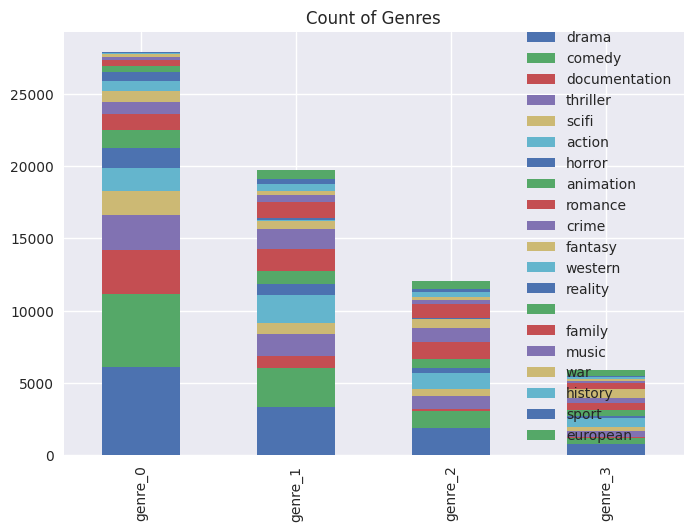

In [19]:
pd.DataFrame([df.genre_0.value_counts(), df.genre_1.value_counts(), df.genre_2.value_counts(), df.genre_3.value_counts()]).plot.bar(stacked=True, title="Count of Genres")

<AxesSubplot:title={'center':'Count of Releases by Year for the top 10 years by genre'}, xlabel='release_year'>

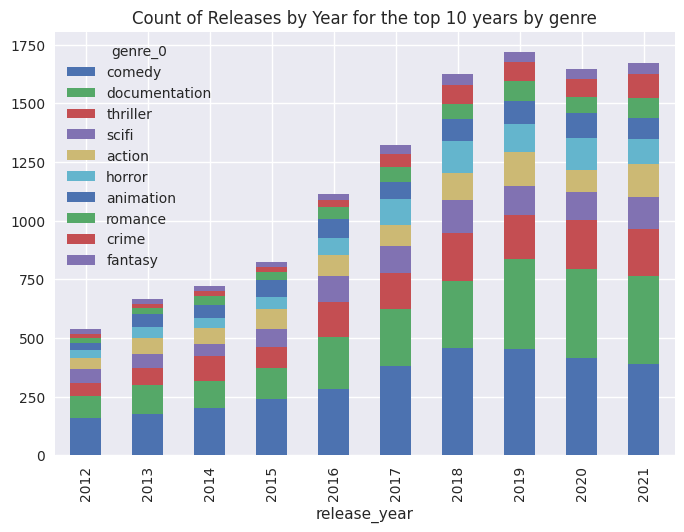

In [20]:
bar_df = (df.groupby(['release_year','genre_0']).size().unstack(fill_value=0))
filter_df = (bar_df.T.sum().sort_values(ascending=False)[:10])
columns = bar_df.sum().sort_values(ascending=False)[1:11].reset_index()["genre_0"].to_list()
columns.append("release_year")
bar_df = bar_df.reset_index()
filter_df = filter_df.reset_index()
bar_df[columns].loc[bar_df["release_year"].isin(filter_df["release_year"])].plot.bar(stacked=True, x="release_year", title="Count of Releases by Year for the top 10 years by genre")

<AxesSubplot:title={'center':'Top 10 Genres by Type'}, xlabel='type'>

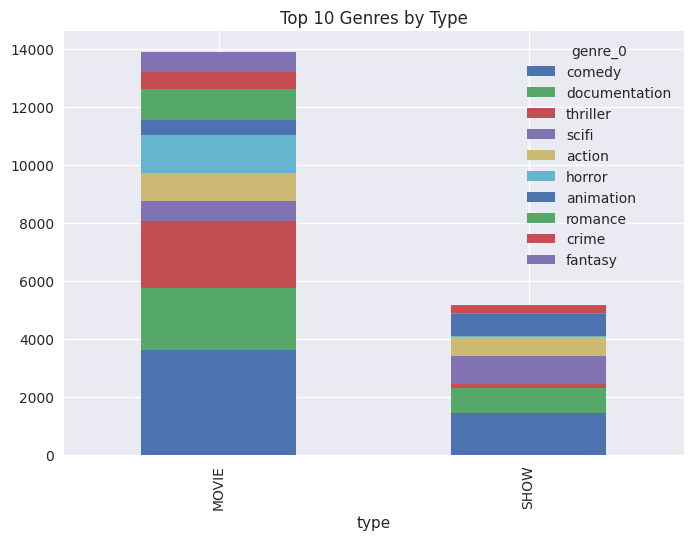

In [21]:
bar_df = (df.groupby(['type','genre_0']).size().unstack(fill_value=0))
columns = bar_df.sum().sort_values(ascending=False)[1:11].reset_index()["genre_0"].to_list()
columns.append("type")
bar_df = bar_df.reset_index()
bar_df[columns].plot.bar(stacked=True, x="type", title="Top 10 Genres by Type")

From this we can make see the obvious conclusion, more records had just 1 genre defined then having multiple with drama and comedy being the two most popular genres.

<AxesSubplot:title={'center':'Top 10 Production Countries'}>

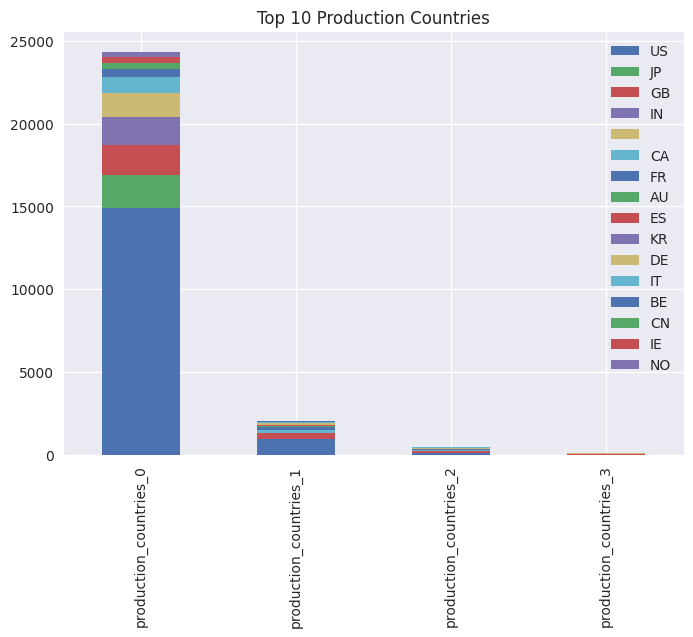

In [22]:
pd.DataFrame([df.production_countries_0.value_counts()[:10], df.production_countries_1.value_counts()[:10], df.production_countries_2.value_counts()[:10], df.production_countries_3.value_counts()[:10]]).plot.bar(stacked=True, title="Top 10 Production Countries")

<AxesSubplot:title={'center':'Count of Releases by Year for the top 10 years by production country'}, xlabel='release_year'>

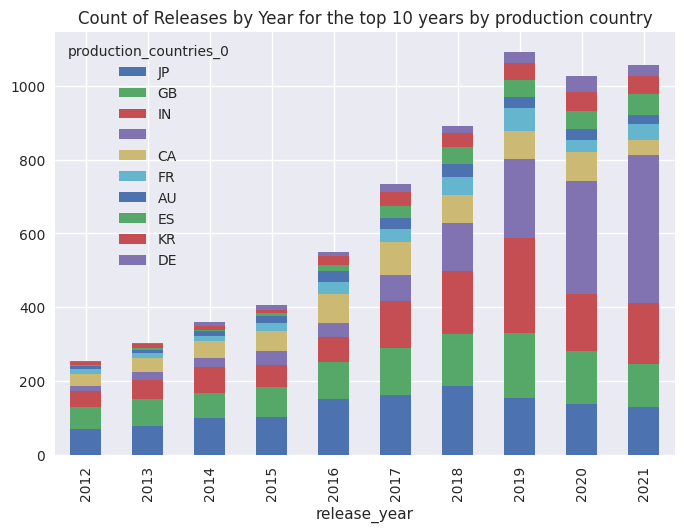

In [23]:
bar_df = (df.groupby(['release_year','production_countries_0']).size().unstack(fill_value=0))
filter_df = (bar_df.T.sum().sort_values(ascending=False)[:10])
columns = bar_df.sum().sort_values(ascending=False)[1:11].reset_index()["production_countries_0"].to_list()
columns.append("release_year")
bar_df = bar_df.reset_index()
filter_df = filter_df.reset_index()
bar_df[columns].loc[bar_df["release_year"].isin(filter_df["release_year"])].plot.bar(stacked=True, x="release_year", title="Count of Releases by Year for the top 10 years by production country")

<AxesSubplot:title={'center':'Top 10 production companies by Type'}, xlabel='type'>

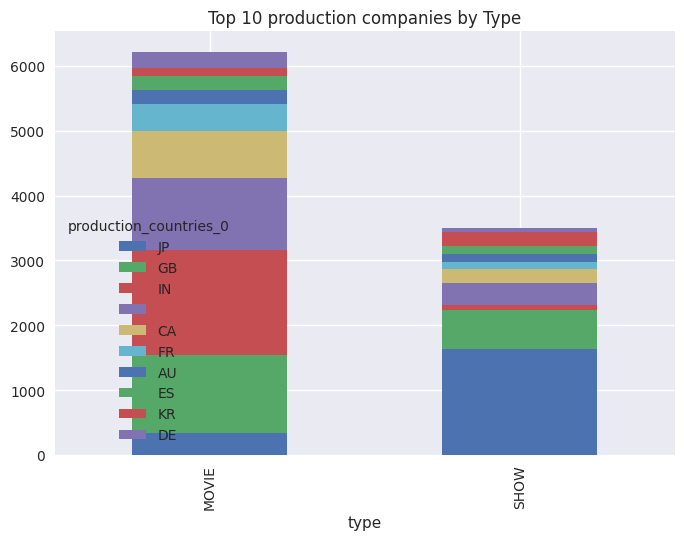

In [24]:
bar_df = (df.groupby(['type','production_countries_0']).size().unstack(fill_value=0))
columns = bar_df.sum().sort_values(ascending=False)[1:11].reset_index()["production_countries_0"].to_list()
columns.append("type")
bar_df = bar_df.reset_index()
bar_df[columns].plot.bar(stacked=True, x="type", title="Top 10 production companies by Type")

Similar to genres, records were more likely to just have one production country and a decreasing amount had multiple. I also made the descision to only display the top 10 countries since there were lots of different values and that made the chart unreadable. An interesting observation about this dataset is there seems to be alot more NULL values in the production categories feature. 

# Conclusion

Some of the big conclusions we can make about this dataset from the above charts:
* This data set is also skewed towards Amazon
* Netflix and Amazon had the most releases in the top years
* Disney had the most votes on IMDB and TMDB, but all the streaming services were relatively close in average scores (besides Dark Matter)
* This dataset is skewed towards movies
* Even though the data is skewed towards movies the average show's IMDB and TMDB scores is higher than the average movies. 